# scaling the data 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(file_path, target_column):
    """
    Loads data from a CSV, splits it into train/validation/test sets,
    and applies StandardScaler to the features.

    Args:
        file_path (str): The path to the CSV file.
        target_column (str): The name of the column to be used as the target/label.

    Returns:
        dict: A dictionary containing the processed data splits
              (X_train, y_train, X_val, y_val, X_test, y_test)
              and the fitted scaler object.
    """
    # 1. Load the dataset from the CSV file
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None

    print("--- Data loaded successfully. ---")
    print(f"Original dataset shape: {df.shape}")

    # 2. Separate features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # 3. First split: 70% for training, 30% for temp (validation + test)
    # The random_state ensures that the split is the same every time you run it.
    # 💡 FIX: Removed the 'stratify' parameter here.
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 4. Second split: Split the 30% temp set into 15% validation and 15% test
    # 💡 FIX: Removed the 'stratify' parameter here as well.
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    print("\n--- Data split into training, validation, and test sets. ---")
    print(f"Training set:   {X_train.shape[0]} samples (70%)")
    print(f"Validation set: {X_val.shape[0]} samples (15%)")
    print(f"Test set:       {X_test.shape[0]} samples (15%)")

    # 5. Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    print("\n--- Feature scaling applied successfully. ---")

    # 6. Store all results in a single dictionary
    preprocessed_data = {
        'X_train': X_train_scaled,
        'y_train': y_train,
        'X_val': X_val_scaled,
        'y_val': y_val,
        'X_test': X_test_scaled,
        'y_test': y_test,
        'scaler': scaler
    }
    
    print("\nPreprocessing complete. Data is ready in the returned dictionary.")
    
    return preprocessed_data

# --- EXAMPLE USAGE ---

# 1. Specify your file path and the name of your target column
csv_file = "../../data analyzing/Concrete_Data_Yeh.csv"
target = 'csMPa'

# 2. Call the function to get the processed data
processed_results = preprocess_data(csv_file, target)

# 3. Now you can easily access all the datasets from the 'processed_results' dictionary
if processed_results:
    print("\n--- Accessing the processed data ---")
    print("\nScaled training features (first 5 rows):")
    print(processed_results['X_train'].head())
    
    print("\nTraining labels (first 5 rows):")
    print(processed_results['y_train'].head())

--- Data loaded successfully. ---
Original dataset shape: (1030, 9)

--- Data split into training, validation, and test sets. ---
Training set:   721 samples (70%)
Validation set: 154 samples (15%)
Test set:       155 samples (15%)

--- Feature scaling applied successfully. ---

Preprocessing complete. Data is ready in the returned dictionary.

--- Accessing the processed data ---

Scaled training features (first 5 rows):
     cement      slag    flyash     water  superplasticizer  coarseaggregate  \
0 -0.828484 -0.855296  0.761701 -0.766488          0.227273         0.415545   
1  0.374823 -0.855296 -0.816913  0.103748         -1.013995         1.136979   
2  0.317566  1.568935 -0.816913 -1.234713          1.352690        -1.551191   
3  0.688809 -0.638541  1.397859 -1.315115          0.789982        -0.405309   
4 -1.130465  1.312252  1.507813 -0.132729          2.130551        -1.730912   

   fineaggregate       age  
0       1.676803 -0.292980  
1       0.141904 -0.633845  
2     

# craeting our firest Neraul network model 
--- Model Summary ---
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 dense (Dense)               (None, 64)                576

 dense_1 (Dense)             (None, 64)                4160

 dense_2 (Dense)             (None, 1)                 65

=================================================================
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
changing the learning rate to 0.0001 and epochs to 1000

_________________________________________________________________


--- Defining Multi-Output Regression Model ---


--- Starting Model Training ---


5/5 [==============================] - 0s 3ms/step

--- Generating and saving diagnostic charts (using the first output: cement) ---


C:\Users\acking\AppData\Local\Temp\ipykernel_11160\35385235.py:121: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_i - y_pred_i) / y_true_i)) * 100


Saved 'bisector_chart_cement_mass.svg' (Focus on cement output)


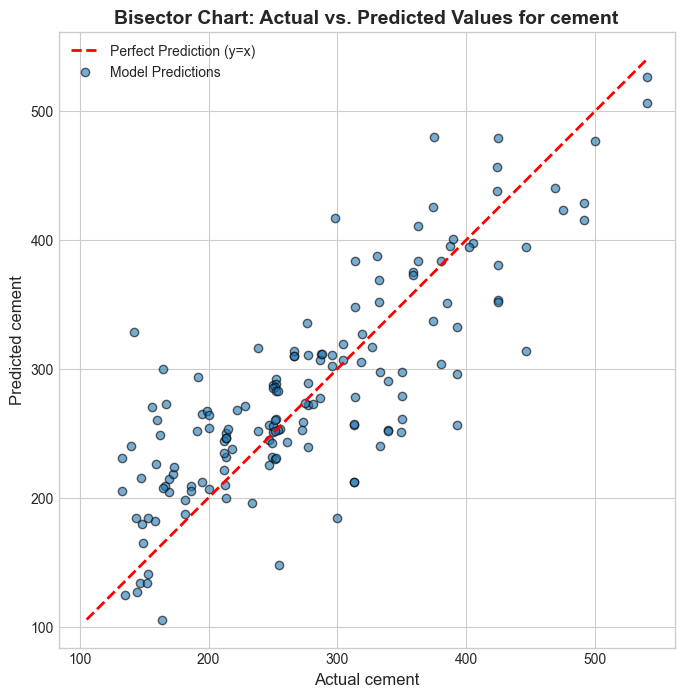

Saved 'loss_curve_multi_output.svg'


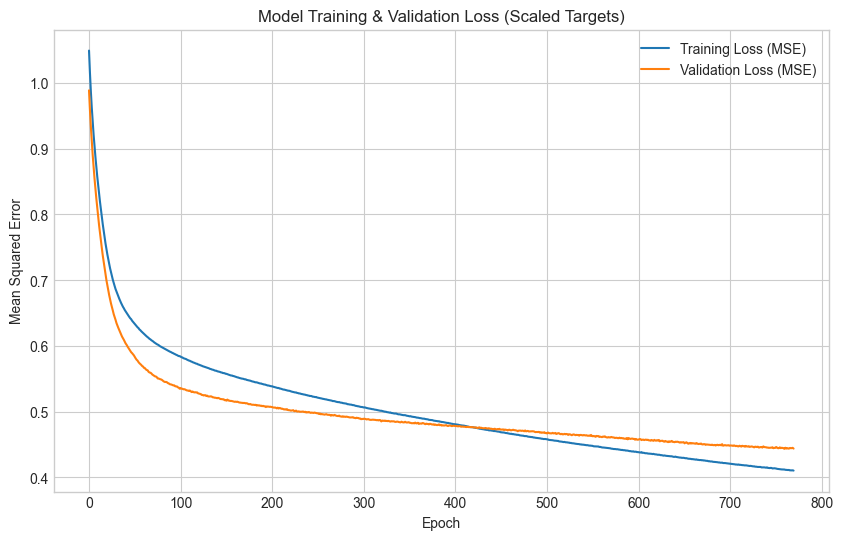

Saved 'residuals_plot_cement_mass.svg' (Focus on cement output)


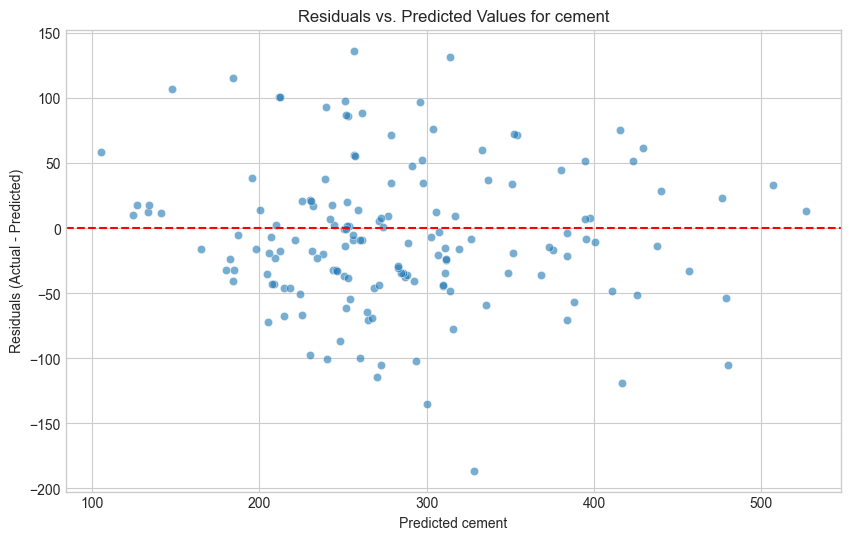


--- Saving model, scalers, and detailed results ---
Model and scalers (X and y) saved.
Detailed model summary and metrics saved to 'model_summary_and_metrics_mix_prediction.csv'
Predictions vs. actuals saved to 'predictions_vs_actuals_mix_prediction.csv'


C:\Users\acking\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# --- Define New Input and Output Columns ---
NEW_TARGET_COLUMNS = ['cement', 'slag', 'flyash', 'water', 'superplasticizer']
NEW_FEATURE_COLUMNS = ['coarseaggregate', 'fineaggregate', 'age', 'csMPa']
num_outputs = len(NEW_TARGET_COLUMNS)

# --- Modified Preprocessing function for Multi-Output Regression ---
def preprocess_multi_output_data(file_path, feature_cols, target_cols):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    
    # Check if all required columns exist
    required_cols = feature_cols + target_cols
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: Missing columns in CSV: {missing_cols}")
        return None

    X = df[feature_cols] # Select the new input features
    y = df[target_cols]  # Select the new multiple output targets

    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )
    
    # Scale features (X)
    scaler_X = StandardScaler()
    scaler_X.fit(X_train)
    X_train_scaled = pd.DataFrame(scaler_X.transform(X_train), columns=X.columns)
    X_val_scaled = pd.DataFrame(scaler_X.transform(X_val), columns=X.columns)
    X_test_scaled = pd.DataFrame(scaler_X.transform(X_test), columns=X.columns)
    
    # Scale targets (y) - CRITICAL for multi-output regression
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train_scaled = pd.DataFrame(scaler_y.transform(y_train), columns=y.columns)
    y_val_scaled = pd.DataFrame(scaler_y.transform(y_val), columns=y.columns)
    y_test_scaled = pd.DataFrame(scaler_y.transform(y_test), columns=y.columns)

    return {
        'X_train': X_train_scaled, 'y_train': y_train_scaled, 
        'X_val': X_val_scaled, 'y_val': y_val_scaled,
        'X_test': X_test_scaled, 'y_test': y_test_scaled,
        'scaler_X': scaler_X, 
        'scaler_y': scaler_y,
        'y_test_unscaled': y_test # Keep original unscaled target for final metric calculation
    }

# --- Load and preprocess the data ---
csv_file = "../../data analyzing/Concrete_Data_Yeh.csv"
processed_results = preprocess_multi_output_data(csv_file, NEW_FEATURE_COLUMNS, NEW_TARGET_COLUMNS)

if processed_results:
    # --- 1. Define the Neural Network Architecture ---
    print("\n--- Defining Multi-Output Regression Model ---")
    model = tf.keras.Sequential([
        # Input shape must match the 4 new features
        tf.keras.layers.Dense(64, activation='relu', input_shape=[len(processed_results['X_train'].columns)]),
        tf.keras.layers.Dense(64, activation='relu'),
        # Output layer size must match the 5 new target columns
        tf.keras.layers.Dense(num_outputs) 
    ])

    # --- 2. Compile the Model ---
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # Retained the new LR
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    # model.summary()

    # --- 3. Train the Model ---
    print("\n--- Starting Model Training ---")
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        processed_results['X_train'], processed_results['y_train'],
        epochs=1000, # Retained the new high epoch count
        validation_data=(processed_results['X_val'], processed_results['y_val']),
        verbose=0,
        callbacks=[early_stopping]
    )

    # --- 4. Evaluate on the Test Set ---
    # Evaluation on scaled data
    test_loss_mse, test_mae = model.evaluate(processed_results['X_test'], processed_results['y_test'], verbose=0)
    
    # Predict and INVERSE TRANSFORM to get unscaled predictions
    y_pred_scaled = model.predict(processed_results['X_test'])
    y_pred_unscaled = processed_results['scaler_y'].inverse_transform(y_pred_scaled)
    
    # Actual unscaled values
    y_true_unscaled = processed_results['y_test_unscaled'].values

    # --- 5. Calculate Additional Dimensionless Error Metrics (Per Output) ---
    r_squared_list = []
    mape_list = []
    
    for i, col in enumerate(NEW_TARGET_COLUMNS):
        y_true_i = y_true_unscaled[:, i]
        y_pred_i = y_pred_unscaled[:, i]
        
        # R-squared 
        r2 = 1 - (np.sum((y_true_i - y_pred_i)**2) / np.sum((y_true_i - np.mean(y_true_i))**2))
        r_squared_list.append(r2)
        
        # MAPE 
        mape = np.mean(np.abs((y_true_i - y_pred_i) / y_true_i)) * 100
        mape_list.append(mape)
    
    avg_r_squared = np.mean(r_squared_list)
    avg_mape = np.mean(mape_list)
    
    # --- 6. Generate and Save Diagnostic Charts (Focus on the first output: cement) ---
    print("\n--- Generating and saving diagnostic charts (using the first output: cement) ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    
    chart_target_idx = 0
    chart_target_name = NEW_TARGET_COLUMNS[chart_target_idx]
    y_true_chart = y_true_unscaled[:, chart_target_idx]
    y_pred_chart = y_pred_unscaled[:, chart_target_idx]
    
    # Chart 1: Bisector Chart (Actual vs. Predicted)
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    perfect_line_coords = np.linspace(min(y_true_chart.min(), y_pred_chart.min()), max(y_true_chart.max(), y_pred_chart.max()), 100)
    ax1.plot(perfect_line_coords, perfect_line_coords, color='red', linestyle='--', linewidth=2, label='Perfect Prediction (y=x)')
    # Note: The +/- 20 MPa lines are not relevant for predicting mass (cement, water, etc.), so they are removed.
    ax1.scatter(y_true_chart, y_pred_chart, alpha=0.6, edgecolors='k', label='Model Predictions')
    ax1.set_xlabel(f'Actual {chart_target_name}', fontsize=12)
    ax1.set_ylabel(f'Predicted {chart_target_name}', fontsize=12)
    ax1.set_title(f'Bisector Chart: Actual vs. Predicted Values for {chart_target_name}', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True)
    ax1.set_aspect('equal', adjustable='box')
    plt.savefig('bisector_chart_cement_mass.svg', format='svg')
    print("Saved 'bisector_chart_cement_mass.svg' (Focus on cement output)")
    plt.show()

    # Chart 2: Training & Validation Loss Curve
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(history.history['loss'], label='Training Loss (MSE)')
    ax2.plot(history.history['val_loss'], label='Validation Loss (MSE)')
    ax2.set_title('Model Training & Validation Loss (Scaled Targets)'), ax2.set_xlabel('Epoch'), ax2.set_ylabel('Mean Squared Error')
    ax2.legend()
    plt.savefig('loss_curve_multi_output.svg', format='svg')
    print("Saved 'loss_curve_multi_output.svg'")
    plt.show()

    # Chart 3: Residuals Plot
    residuals_chart = y_true_chart - y_pred_chart
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=y_pred_chart, y=residuals_chart, alpha=0.6, ax=ax3)
    ax3.axhline(y=0, color='red', linestyle='--')
    ax3.set_title(f'Residuals vs. Predicted Values for {chart_target_name}'), ax3.set_xlabel(f'Predicted {chart_target_name}'), ax3.set_ylabel('Residuals (Actual - Predicted)')
    plt.savefig('residuals_plot_cement_mass.svg', format='svg')
    print("Saved 'residuals_plot_cement_mass.svg' (Focus on cement output)")
    plt.show()

    # --- 7. Save Artifacts and Detailed Results CSV ---
    print("\n--- Saving model, scalers, and detailed results ---")
    model.save('concrete_mix_model.h5')
    joblib.dump(processed_results['scaler_X'], 'scaler_X.gz') # Save X scaler
    joblib.dump(processed_results['scaler_y'], 'scaler_y.gz') # Save Y scaler
    print("Model and scalers (X and y) saved.")

    # Get model architecture details dynamically
    model_config_str = []
    for layer in model.layers:
        config = layer.get_config()
        layer_name = config.get('name', layer.__class__.__name__)
        units = config.get('units', '')
        activation = config.get('activation', 'linear')
        model_config_str.append(f"{layer_name}({units if units else ''},{activation})")
    model_architecture_desc = " -> ".join(model_config_str)

    # Create a detailed dictionary for model architecture and performance
    results_summary = {
        # Model Architecture
        'Model_Description': model_architecture_desc,
        'Input_Features': str(NEW_FEATURE_COLUMNS),
        'Output_Targets': str(NEW_TARGET_COLUMNS),
        'Total_Parameters': model.count_params(),
        'Optimizer': optimizer.__class__.__name__,
        'Learning_Rate': optimizer.learning_rate.numpy(),
        'Epochs_Trained': len(history.history['loss']),
        'Early_Stopping_Enabled': True,
        'Loss_Function': 'Mean Squared Error (MSE)',
        'Metrics_Monitored': 'Mean Absolute Error (MAE)',
        # Performance Metrics (on Scaled Data)
        'Total_MSE_test_set_scaled': test_loss_mse,
        'Total_MAE_test_set_scaled': test_mae,
        # Performance Metrics (on Unscaled Data - Averaged)
        'Avg_R_squared_unscaled': avg_r_squared,
        'Avg_MAPE_%_unscaled': avg_mape
    }

    # Add R2 and MAPE for each individual target
    for i, col in enumerate(NEW_TARGET_COLUMNS):
        results_summary[f'R_squared_{col}'] = r_squared_list[i]
        results_summary[f'MAPE_%_{col}'] = mape_list[i]
        
    # Convert to a DataFrame and save to CSV
    df_results = pd.DataFrame([results_summary])
    df_results.to_csv('model_summary_and_metrics_mix_prediction.csv', index=False)
    print("Detailed model summary and metrics saved to 'model_summary_and_metrics_mix_prediction.csv'")

    # Save predictions for detailed analysis
    df_predictions = pd.DataFrame(y_true_unscaled, columns=[f'Actual_{col}' for col in NEW_TARGET_COLUMNS])
    df_predictions = df_predictions.assign(**{f'Predicted_{col}': y_pred_unscaled[:, i] for i, col in enumerate(NEW_TARGET_COLUMNS)})
    df_predictions.to_csv('predictions_vs_actuals_mix_prediction.csv', index=False)
    print("Predictions vs. actuals saved to 'predictions_vs_actuals_mix_prediction.csv'")

# HOw to load and use models 

In [ ]:
import tensorflow as tf
import joblib
import numpy as np

# --- Load the saved model and scaler ---
loaded_model = tf.keras.models.load_model('concrete_strength_model.h5')
loaded_scaler = joblib.load('scaler.gz')

# --- Imagine you have new data for one sample ---
# IMPORTANT: The new data must have the same features in the same order as the training data.
# (cement, slag, flyash, water, superplasticizer, coarseagg, fineagg, age)
new_concrete_sample = np.array([[540, 0, 0, 162, 2.5, 1040, 676, 28]])

# --- Preprocess the new data using the LOADED scaler ---
new_sample_scaled = loaded_scaler.transform(new_concrete_sample)

# --- Make a prediction ---
prediction = loaded_model.predict(new_sample_scaled)

print(f"\n--- Prediction on New Data ---")
print(f"Predicted Concrete Strength: {prediction[0][0]:.2f} csMPa")